# **Feature Selection and Data Handling Methods with Model Building and Evaluation**

Submitted by: Cansana, Ma. Katrina Isabela "Kyla"

**Data Exploration and Preprocessing**

In [ ]:
# Import libraries & load dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer
from sklearn.svm import SVC

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from pathlib import Path

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

datasets_folder = Path('/gdrive/MyDrive/datasets/')

df = pd.read_csv(datasets_folder / 'MBA.csv', encoding='latin1')
df.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [ ]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [ ]:
# Check missing values
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [ ]:
# EDA - Describe data
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000



Target Variable Distribution:


<ipython-input-5-12920744a937>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='admission', data=df, palette='tab10')


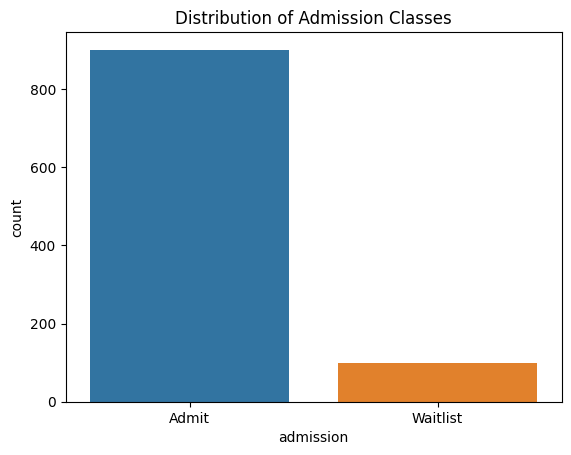

In [ ]:
# EDA - Check the distribution of the target variable 'admission'
print("\nTarget Variable Distribution:")
sns.countplot(x='admission', data=df, palette='tab10')
plt.title("Distribution of Admission Classes")
plt.show()

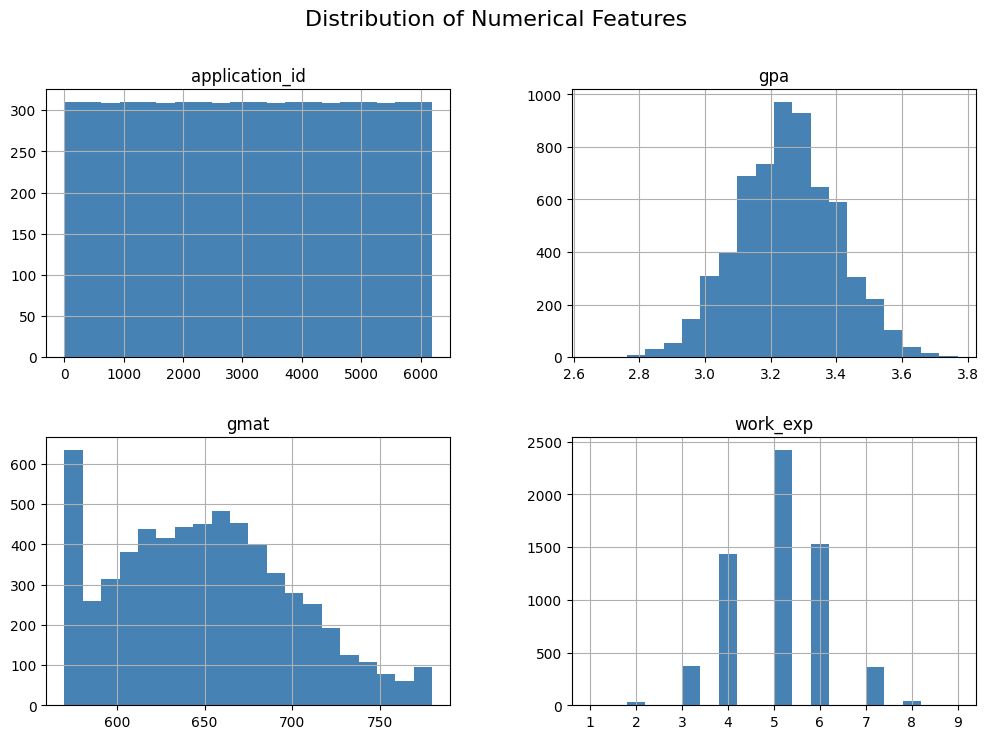

In [ ]:
# EDA - Check distribution of original numeric features
df.hist(figsize=(12, 8), bins=20, color='steelblue')
plt.suptitle('Distribution of Numerical Features', size=16)
plt.show()

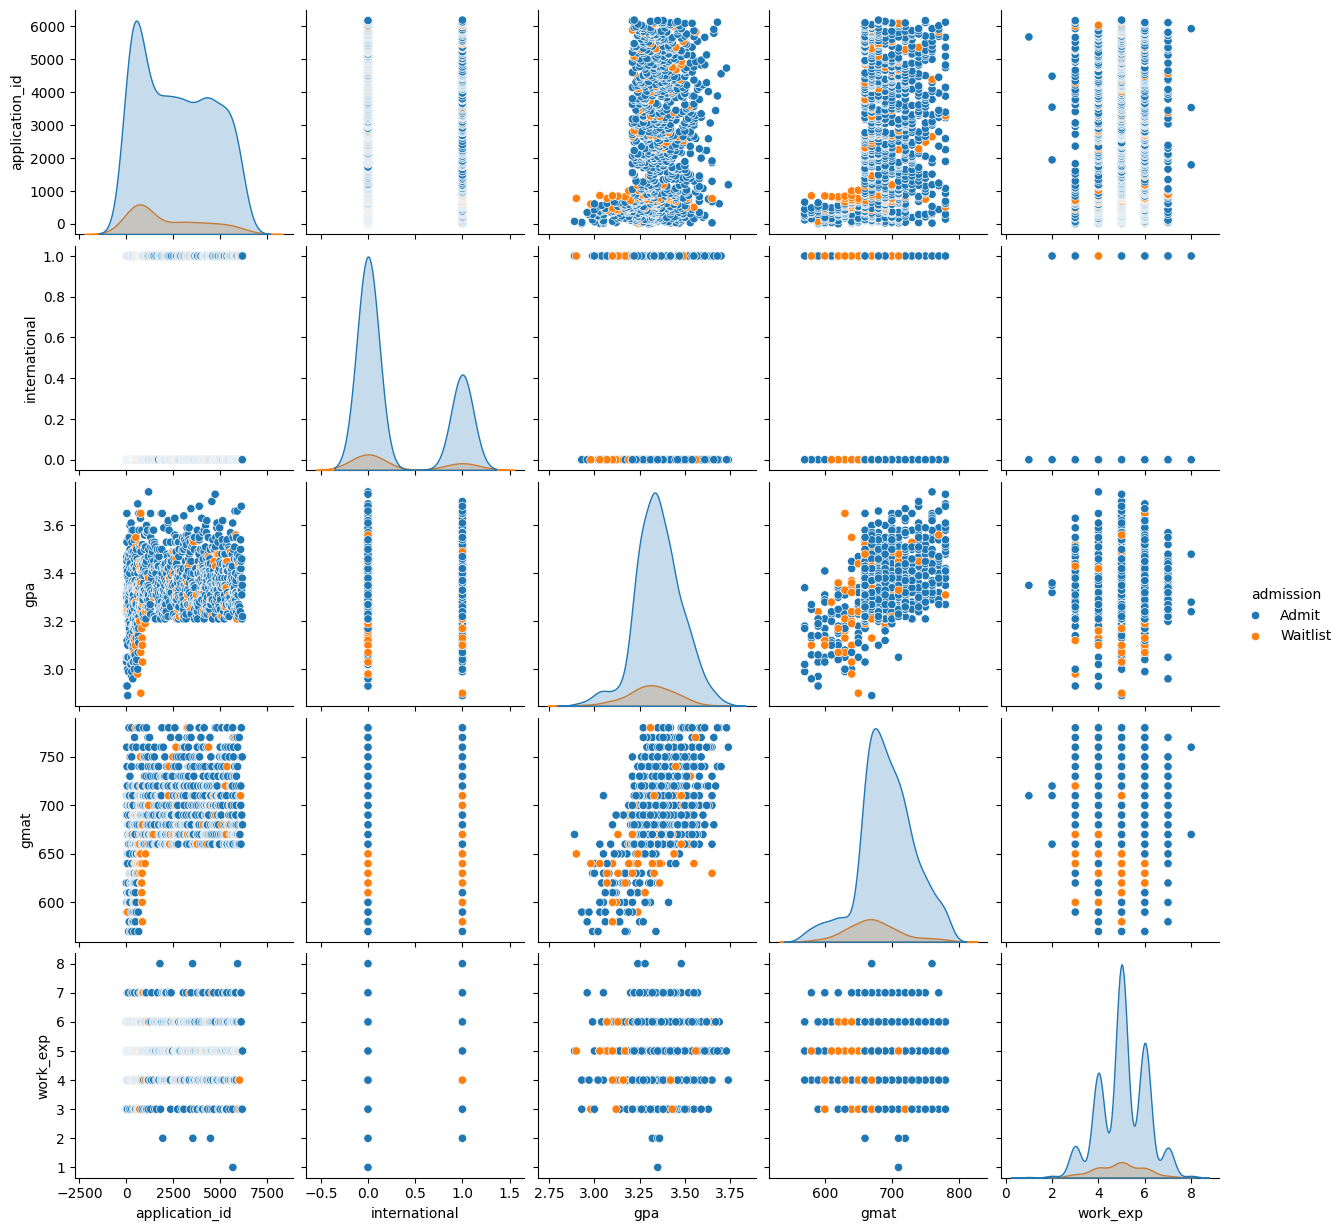

In [ ]:
# EDA - Create pair plot with custom settings
sns.pairplot(data=df, hue="admission", diag_kind="kde", palette="tab10")

# Show plot
plt.show()





**> Identify and analyze the types of missing data (MCAR, MAR, MNAR) based on domain knowledge and statistical tests. Justify your choice of missing data handling technique based on the identified type of missing data.**

Upon exploring the data, the missing data in the dataset may be classified as Missing Not at Random (MNAR). In the "Race" column, all missing values correspond to individuals who should be categorized as "International," meaning the absence of this information is not random but systematically linked to their international status. Similarly, the missing values in the "Admission" column are associated with cases where the outcome is "Deny," indicating a non-random pattern related to rejections. Given this, imputation with domain knowledge is the most appropriate missing data handling technique based on the identified type of missing data. In the following code, missing values in "Race" are filled with "International," and those in "Admission" are imputed as "Deny," ensuring that the imputation reflects the actual values these missing entries represent. Indeed, this approach preserves data integrity and prevents bias from other random imputation methods.



In [ ]:
# Handle missing values
model_data = df.copy()
model_data['admission'] = model_data['admission'].fillna('Deny')
model_data['race'] = model_data['race'].fillna('International')
model_data

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,3,Female,True,3.30,Business,International,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,Deny
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,Deny
6191,6192,Female,True,3.22,Business,International,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,International,590.0,5.0,Other,Deny


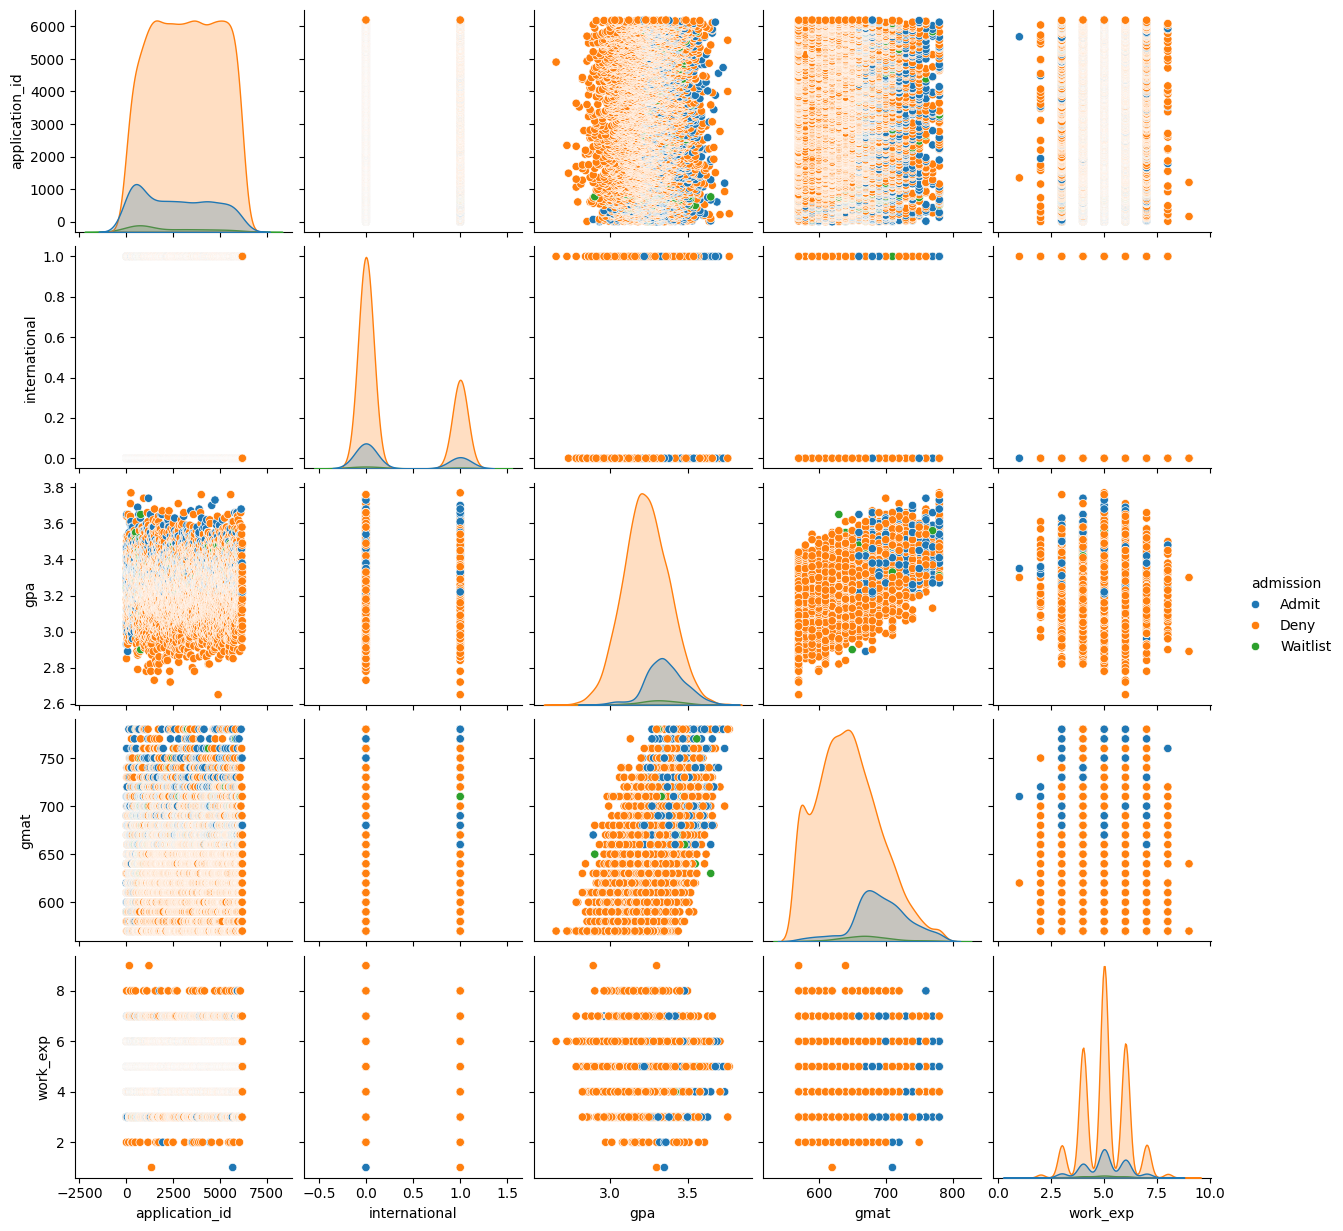

In [ ]:
# Analyze distribution of variables
sns.pairplot(data=model_data, hue="admission", diag_kind="kde", palette="tab10")

# Show plot
plt.show()

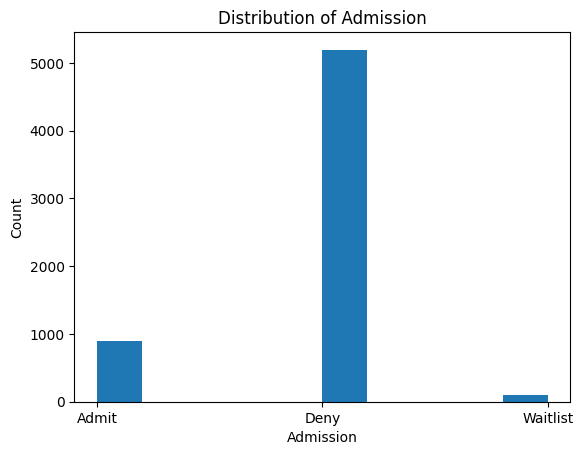

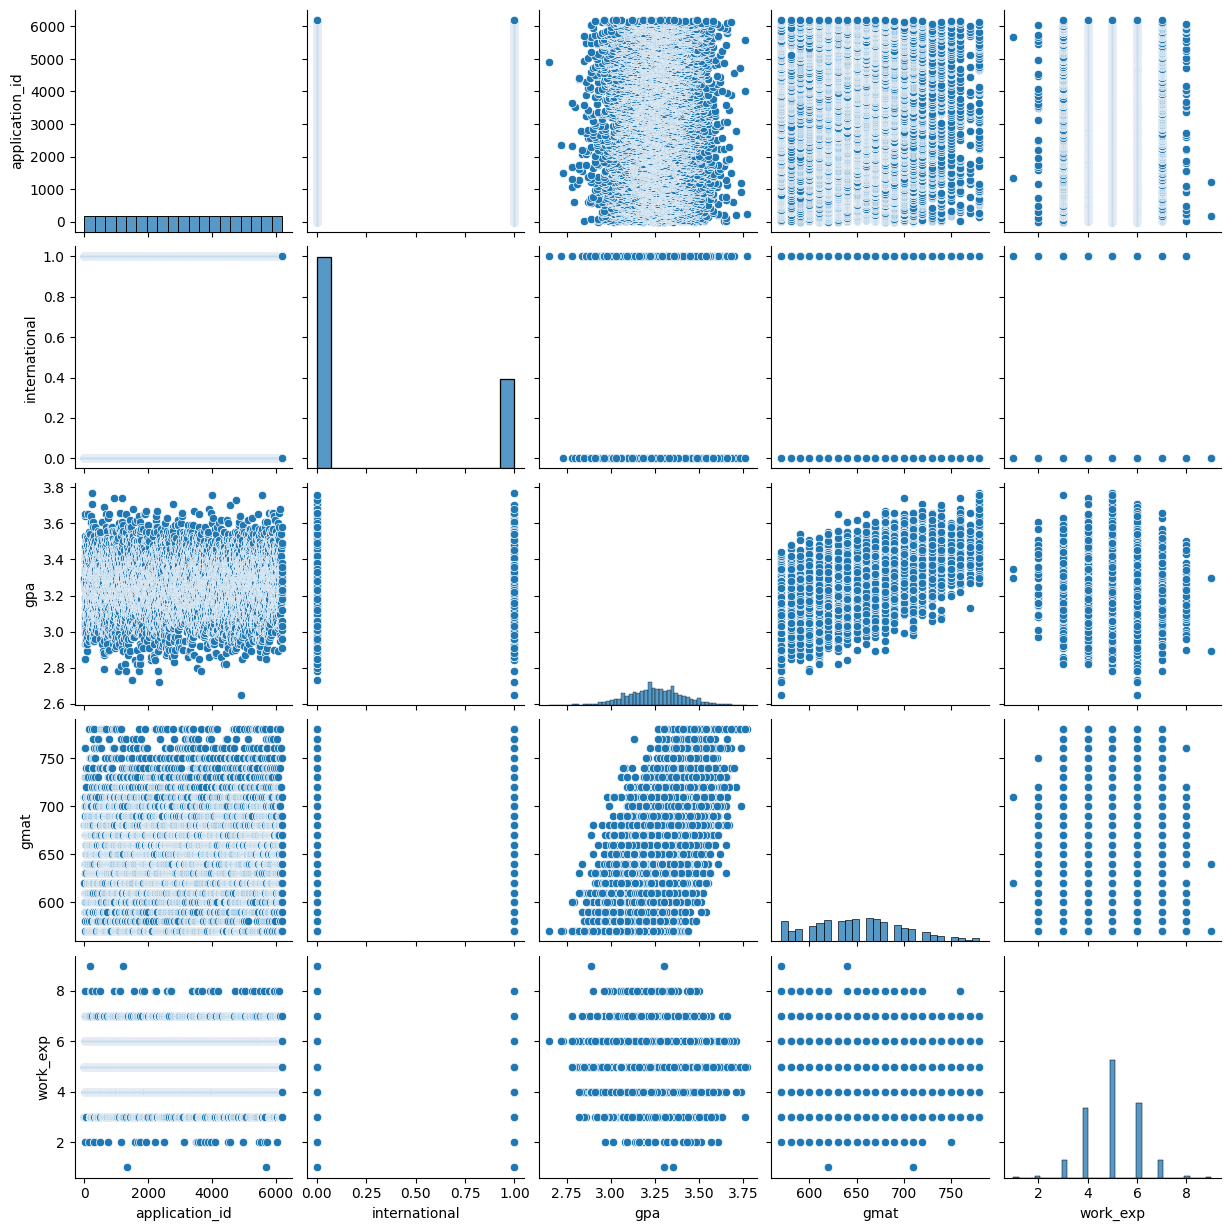

In [ ]:
# Histogram of 'Admission'
plt.hist(model_data['admission'])
plt.xlabel('Admission')
plt.ylabel('Count')
plt.title('Distribution of Admission')
plt.show()

# Check distribution of features
sns.pairplot(model_data[['application_id',	'gender', 'international',	'gpa',	'major',	'race',	'gmat',	'work_exp',	'work_industry', 'admission']])

In [ ]:
# Impute and organize values
number_imputer = SimpleImputer(strategy='mean')
numbers = model_data.select_dtypes(include=['float64','int64']).columns
model_data[numbers] = number_imputer.fit_transform(model_data[numbers])

# Standardize features
scaler = StandardScaler()
model_data[numbers] = scaler.fit_transform(model_data[numbers])

# Normalize numeric features
model_data[numbers] = normalize(model_data[numbers])
model_data[numbers]

,application_id,gpa,gmat,work_exp
0,-0.640086,0.120221,-0.233154,-0.722133
1,-0.941843,0.105148,0.319054,-0.008933
2,-0.813180,0.152830,0.561535,-0.007716
3,-0.672557,0.562569,0.306846,0.370175
4,-0.776812,0.294294,-0.556687,-0.007375
...,...,...,...,...
6189,0.735080,0.671163,-0.095651,-0.006979
6190,0.831571,-0.224304,0.184368,-0.473482
6191,0.941289,-0.110242,0.318970,-0.008931
6192,0.770094,0.320822,-0.551339,-0.007304


In [ ]:
# Encode categorical features
categorical_columns = ['gender', 'international', 'major', 'race', 'work_industry', 'admission']
encoded_data = model_data.copy()
label_encoder = LabelEncoder()

for col in categorical_columns:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

encoded_data

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,-0.640086,0,0,0.120221,0,0,-0.233154,-0.722133,3,0
1,-0.941843,1,0,0.105148,1,1,0.319054,-0.008933,6,1
2,-0.813180,0,1,0.152830,0,3,0.561535,-0.007716,13,0
3,-0.672557,1,0,0.562569,2,1,0.306846,0.370175,13,1
4,-0.776812,1,0,0.294294,2,2,-0.556687,-0.007375,1,1
...,...,...,...,...,...,...,...,...,...,...
6189,0.735080,1,0,0.671163,0,5,-0.095651,-0.006979,9,1
6190,0.831571,1,0,-0.224304,2,1,0.184368,-0.473482,1,1
6191,0.941289,0,1,-0.110242,0,3,0.318970,-0.008931,4,0
6192,0.770094,1,1,0.320822,0,3,-0.551339,-0.007304,9,1


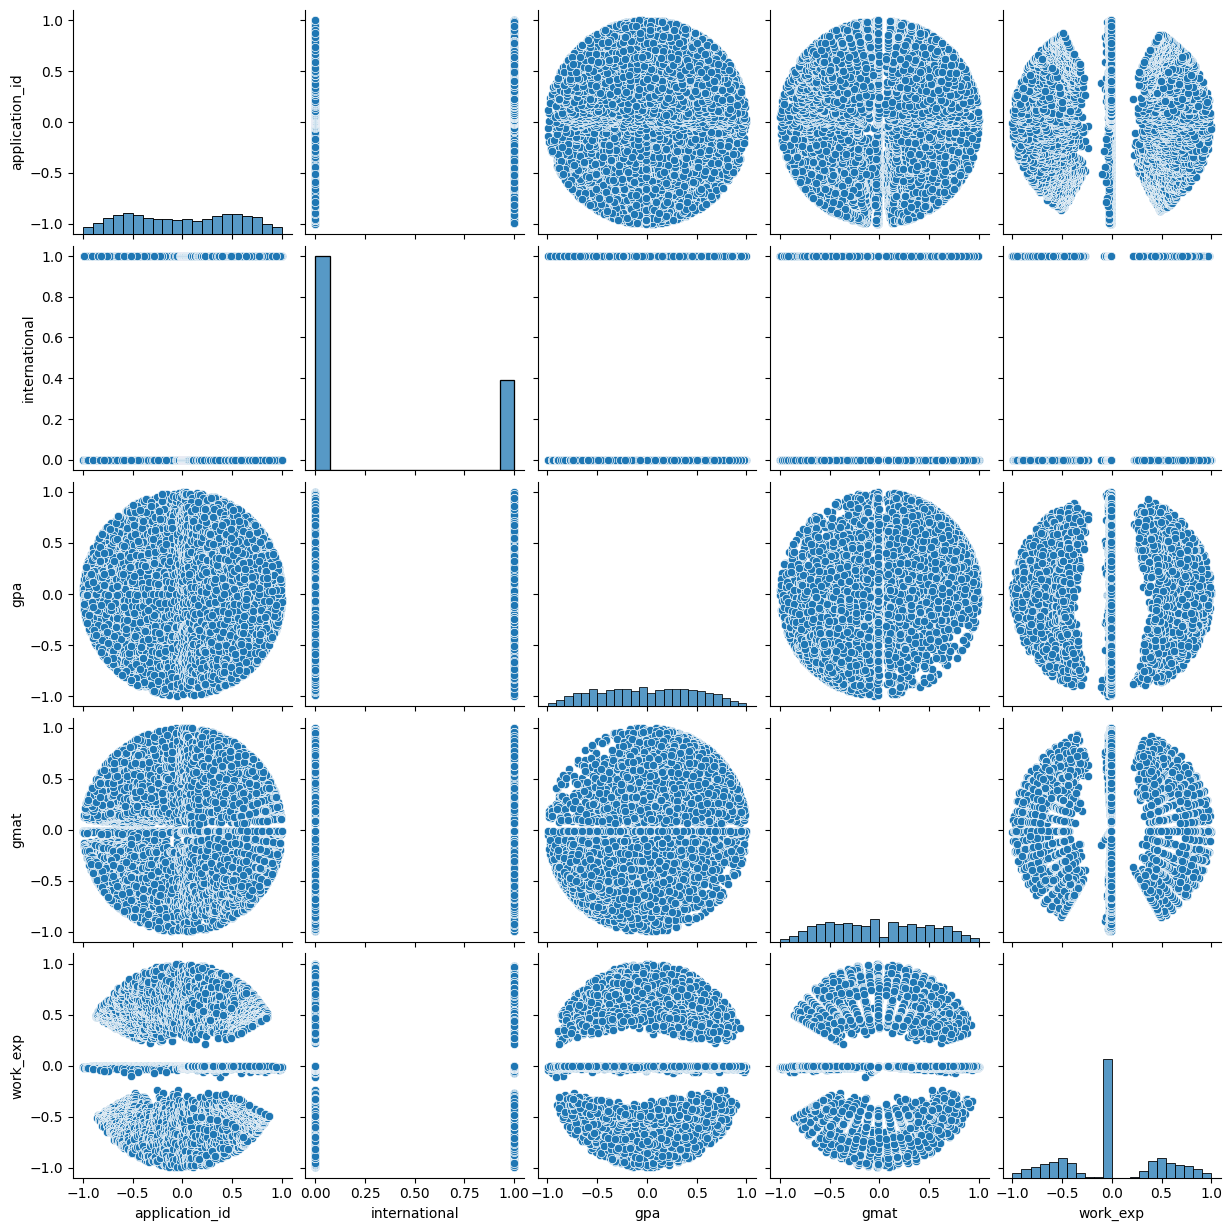

In [ ]:
# Check distribution of features
sns.pairplot(model_data[['application_id',	'gender', 'international',	'gpa',	'major',	'race',	'gmat',	'work_exp',	'work_industry', 'admission']])

*Analyze & interpret distribution of features and target variables.*

The graphs formed reveal insights into the relationships between the following variables: application_id, gender, international, gpa, major, race, gmat, work_exp, work_industry, and admission. In terms of each variable, the distribution of application_id appears uniform. Next, gender shows the count of male and female applicants, as well as international shows the count of international and domestic students. For the gpa and gmat, the distribution is roughly bell-shaped with some outliers on the lower end for gpa and higher end for gmat respectively. Aside from that, major showed the distribution of undergraduate majors and race showed the distribution of racial backgrounds, where most of the data were other international students. In terms of work experience nad work industry, the distribution was skewed to the right showing a concentration of applications having less than 5 years of experience. Finally, the target variable of admission showed the distribution of admission statuses, where majority were with a denied status, followed by admitted then waitlisted.

**Feature Selection**

In [ ]:
# Split Data
X = encoded_data.drop('admission', axis=1)
y = encoded_data['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train",X_train.shape)
print("Validation",X_val.shape)
print("Test",X_test.shape)

Train (3964, 9)
Validation (991, 9)
Test (1239, 9)


<Axes: >

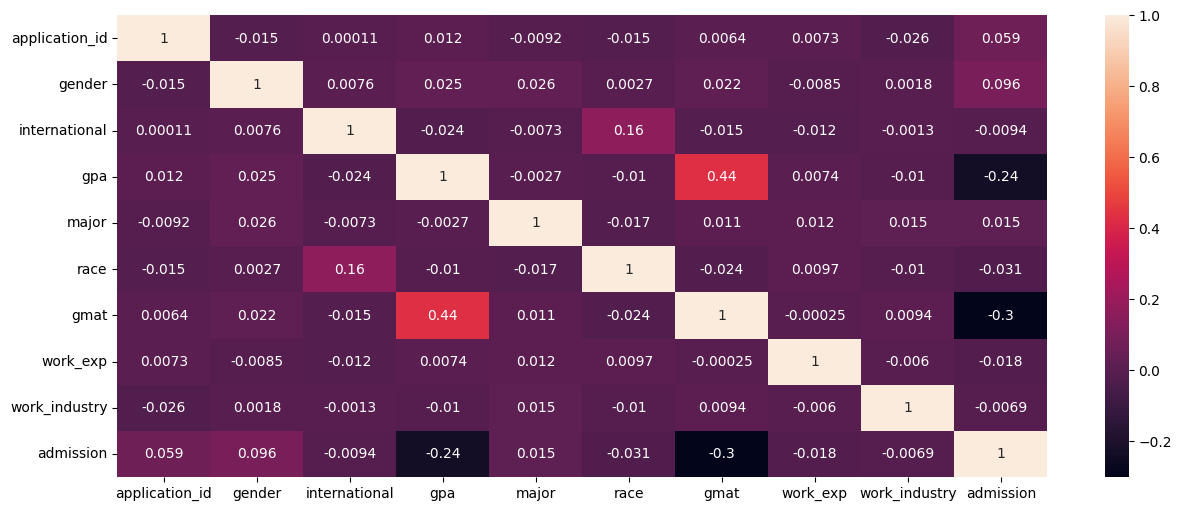

In [ ]:
# Correlation
df_corr = encoded_data.corr()
plt.figure(figsize=(15,6))
sns.heatmap(df_corr, annot=True, )

In [ ]:
# Get feature with > .2 correlation coefficient with respect to 'admission'
threshold = .2
corr_target = df_corr['admission'].abs()
print(corr_target)
selected_feat = corr_target[corr_target > threshold].index
encoded_data[selected_feat]

application_id    0.059499
gender            0.096395
international     0.009369
gpa               0.236272
major             0.014677
race              0.031443
gmat              0.301895
work_exp          0.017668
work_industry     0.006941
admission         1.000000
Name: admission, dtype: float64


,gpa,gmat,admission
0,0.120221,-0.233154,0
1,0.105148,0.319054,1
2,0.152830,0.561535,0
3,0.562569,0.306846,1
4,0.294294,-0.556687,1
...,...,...,...
6189,0.671163,-0.095651,1
6190,-0.224304,0.184368,1
6191,-0.110242,0.318970,0
6192,0.320822,-0.551339,1


In [ ]:
# Drop target variable as part of the feature selection
df_corr = df_corr.drop(labels="admission", axis=1)

correlated_features = set()
threshold = .5
for i in range(len(df_corr.columns)):
    for j in range(i):
        print(i, ' ', j, df_corr.columns[i], '-', df_corr.columns[j])
        if abs(df_corr.iloc[i, j]) > threshold:
            colname = df_corr.columns[i]
            #print(f"\t {colname}")
            correlated_features.add(colname)

print(correlated_features)
encoded_data.drop(labels=correlated_features, axis=1)

1   0 gender - application_id
2   0 international - application_id
2   1 international - gender
3   0 gpa - application_id
3   1 gpa - gender
3   2 gpa - international
4   0 major - application_id
4   1 major - gender
4   2 major - international
4   3 major - gpa
5   0 race - application_id
5   1 race - gender
5   2 race - international
5   3 race - gpa
5   4 race - major
6   0 gmat - application_id
6   1 gmat - gender
6   2 gmat - international
6   3 gmat - gpa
6   4 gmat - major
6   5 gmat - race
7   0 work_exp - application_id
7   1 work_exp - gender
7   2 work_exp - international
7   3 work_exp - gpa
7   4 work_exp - major
7   5 work_exp - race
7   6 work_exp - gmat
8   0 work_industry - application_id
8   1 work_industry - gender
8   2 work_industry - international
8   3 work_industry - gpa
8   4 work_industry - major
8   5 work_industry - race
8   6 work_industry - gmat
8   7 work_industry - work_exp
set()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,-0.640086,0,0,0.120221,0,0,-0.233154,-0.722133,3,0
1,-0.941843,1,0,0.105148,1,1,0.319054,-0.008933,6,1
2,-0.813180,0,1,0.152830,0,3,0.561535,-0.007716,13,0
3,-0.672557,1,0,0.562569,2,1,0.306846,0.370175,13,1
4,-0.776812,1,0,0.294294,2,2,-0.556687,-0.007375,1,1
...,...,...,...,...,...,...,...,...,...,...
6189,0.735080,1,0,0.671163,0,5,-0.095651,-0.006979,9,1
6190,0.831571,1,0,-0.224304,2,1,0.184368,-0.473482,1,1
6191,0.941289,0,1,-0.110242,0,3,0.318970,-0.008931,4,0
6192,0.770094,1,1,0.320822,0,3,-0.551339,-0.007304,9,1


In [ ]:
# Recursive Feature Elimination
estimator = LogisticRegression()

selector = RFE(estimator, n_features_to_select=7, step=1)
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print("Selected features using RFE:", selected_features)

Selected features using RFE: Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat'],
      dtype='object')


In [ ]:
rfecv = RFECV(estimator=estimator, scoring='accuracy', min_features_to_select=3, cv=5)  # Specify cv for cross-validation
rfecv.fit(X_train, y_train)

print("Optimal number of features:", rfecv.n_features_)
print("Selected features using RFECV:", X_train.columns[rfecv.support_])

Optimal number of features: 8
Selected features using RFECV: Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat', 'work_exp'],
      dtype='object')


In [ ]:
X_train.columns[rfecv.support_]

Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat', 'work_exp'],
      dtype='object')

In [ ]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False])

In [ ]:
temp_df = pd.DataFrame()
temp_df['feature'] = X_train.columns
temp_df['rank'] = rfecv.ranking_
print(temp_df.sort_values(by='rank'))

          feature  rank
0  application_id     1
1          gender     1
2   international     1
3             gpa     1
4           major     1
5            race     1
6            gmat     1
7        work_exp     1
8   work_industry     2




**> Rank the features based on their importance and select a subset of relevant features. Justify your choice of feature selection methods and explain the rationale behind your feature selection.**

Through the feature selection methods, the features may be ranked based on importance and relevance. In the correlation test, we observed 'gpa' and 'gmat,' hence involving the Grade Point Average of the applicant (on 4.0 scale) and GMAT score of the applicant (800 points) in the selection. This method was done with the rationale of getting the features that are highly correlated to our target variable. Specifically, we got the feature with > .2 correlation coefficient with respect to our target variable of admission. Moving forward, we also utilized Recursive Feature Elimination, which was relevant to the goal of ranking features based on their importance and selecting a subset of relevant features. Basically, RFE systematically evaluates each feature’s contribution to the model's performance by iteratively removing the least significant features based on the model’s coefficients. The intention behind this approach is to refine the feature set, ensuring that only the most informative variables remain, which can enhance both the interpretability and predictive accuracy of the model. In this case, the work_industry feature being ranked 2 may suggest that it is less important than the features ranked 1. Therefore, the subset of relevant features according to the rank include 'application_id', 'gender', 'international', 'gpa', 'major', 'race', and 'gmat.'

**Handling Imbalanced Data**

admission
1    5194
0     900
2     100
Name: count, dtype: int64


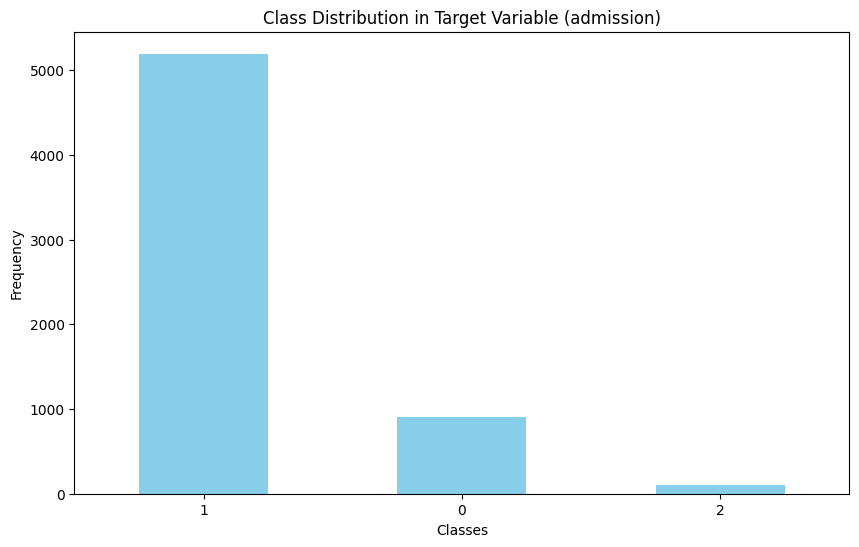

Is the dataset imbalanced? Yes


In [ ]:
# Analyze class distribution
class_counts = encoded_data['admission'].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution in Target Variable (admission)')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Confirm if dataset is imbalanced
threshold = 0.1
is_imbalanced = (class_counts / class_counts.sum()).min() < threshold
print(f'Is the dataset imbalanced? {"Yes" if is_imbalanced else "No"}')

In [ ]:
# Random Undersampling

# Separate features and target variable
X = encoded_data.drop(columns=['admission'])
y = encoded_data['admission']

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after undersampling:")
print(y_under.value_counts())

Class distribution after undersampling:
admission
0    100
1    100
2    100
Name: count, dtype: int64


In [ ]:
# SMOTE (Synthetic Minority Over-sampling Technique)

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
admission
0    5194
1    5194
2    5194
Name: count, dtype: int64




**> Evaluate the impact of these techniques on the model's performance.**

Given the methods above, the implementation of undersampling and SMOTE to address class imbalance in the dataset yielded significant results. After undersampling, the class distribution was balanced with 100 samples for each class (0, 1, and 2), which effectively simplified the dataset but potentially discarded valuable information from the majority class. In contrast, SMOTE generated synthetic samples, resulting in a balanced distribution of 5,194 samples for each class. This approach relatively retains the overall dataset size and improves the model's ability to learn from all classes, thereby enhancing generalization. As a result, while undersampling may lead to a more straightforward model, SMOTE offers a more robust solution that better preserves the underlying patterns in the data. Hence, this may lead to improved model performance across various metrics.

**BONUS: Model Building and Evaluation**

In [ ]:
# Support Vector Machine (SVM)

# Initialize and train the SVM model
clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Initial Model Performance:")
initial_performance = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
}

initial_performance

Initial Model Performance:


{'Accuracy': 0.8272800645682001,
 'Precision': 0.6843923052319654,
 'Recall': 0.8272800645682001,
 'F1 Score': 0.7490830973342801}

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=10, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.765 total time=   0.2s
[CV 2/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.762 total time=   0.2s
[CV 3/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.762 total time=   0.2s
[CV 4/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.762 total time=   0.2s
[CV 5/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.768 total time=   0.2s
[CV 6/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.768 total time=   0.2s
[CV 7/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.768 total time=   0.2s
[CV 8/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.768 total time=   0.2s
[CV 9/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.768 total time=   0.2s
[CV 10/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=0.768 total time=   0.2s
[CV 1/10] END ....C=0.1, gamma=0.01, kernel=rbf;, score=0.765 total time=   0.2s
[CV 2/10] END ....C=0.1, gamma=0.01, kernel=rb

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='f1_weighted', verbose=3)

In [ ]:
# Predictions using the best estimator
y_pred_tuned = grid_search.predict(X_test)
print("Tuned Model Performance:")
tuned_performance = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred_tuned, average='weighted'),
    "Recall": recall_score(y_test, y_pred_tuned, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_tuned, average='weighted')
}

tuned_performance

Tuned Model Performance:


{'Accuracy': 0.8272800645682001,
 'Precision': 0.7798025426483924,
 'Recall': 0.8054882970137207,
 'F1 Score': 0.7903196952858962}

In [ ]:
# Visualizing best hyperparameters
best_params = grid_search.best_params_
best_params

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

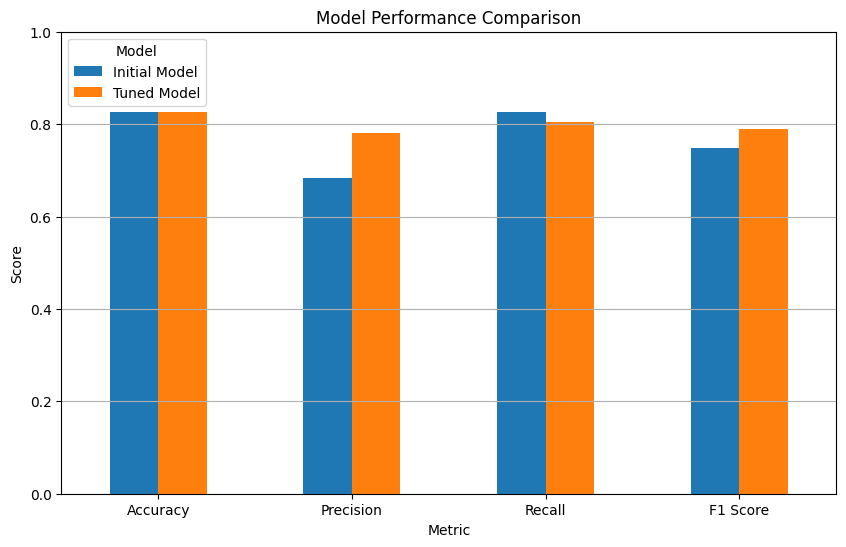

In [ ]:
# Prepare data for the performance comparison plot
metrics = ['Accuracy','Precision', 'Recall','F1 Score']
initial_scores = [initial_performance[metric] for metric in metrics]
tuned_scores = [tuned_performance[metric] for metric in metrics]

performance_df = pd.DataFrame({
    'Metric': metrics,
    'Initial Model': initial_scores,
    'Tuned Model': tuned_scores
})

# Plotting
performance_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(title='Model', loc='upper left')
plt.show()

*Model Evaluation*

The comparison between the initial and tuned SVM models shows that tuning may have improved precision and the F1 score slightly, with precision increasing from 0.68 to 0.78, and the F1 score also improving marginally. However, recall decreased slightly from 0.82 to 0.81, indicating a small trade-off between precision and recall. Accuracy remained largely unchanged for both models at around 0.82. Overall, the tuned model better balances precision and recall, possibly making it more effective at reducing false positives, though recall still saw a minor decline.



**> Discuss the strengths and weaknesses of the chosen model and suggest potential improvements.**

Aligned with the given and acquired data, the chosen model is the Support Vector Machine (SVM). When it comes to its strengths, it is effective in high-dimensional spaces, allowing it to model complex decision boundaries through the use of different kernel functions. In this case, it is relevant for classification tasks. Specifically, it is suited for the MBA Admission dataset from the Wharton Class of 2025, including variables like GPA, GMAT scores, work experience, and industry background etc., as they are all crucial in determining admission outcomes. SVM is strong in handling multi-class classification problems like the "Admit," "Waitlist," or "Deny" statuses, which are influenced by both numeric and categorical features. With its ability to use different kernels, SVM can capture non-linear patterns in the relationship between variables such as GPA, GMAT, or work experience across different industries. On the other hand, there are also weaknesses to the model, including its sensitivity to hyperparameters like C and gamma as well as the kernal used. Also, SVM may have challenges with imbalanced datasets, thus the previous steps of handling imbalanced data was useful for this model. With that being said, in terms of potential improvements, exploring alternative kernel functions could help optimize the model's accuracy and adaptability to diverse datasets as well as employing cross-validation techniques to evaluate model stability across different splits can provide additional insights into overall its reliability and performance.